# Spotify Data Exploration and Prediction Modeling

### Import Libraries

In [1]:
#pip install plotly.express

In [2]:
import numpy as np
import pandas as pd

# EDA
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Modeling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.metrics import classification_report,confusion_matrix

### Read in Data

In [3]:
# Data for Exploration
spot_df = pd.read_csv("genres_v2.csv", low_memory=False)
spot_df.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence  ...                      id  \
0          0.013400    0.0556   0.3890  ...  2Vc6NJ9PW9gD9q343XFRKx   
1          0.000000    0.1180   0.1240  ...  7pgJBLVz5VmnL7uGHmRj6p   
2          0.000004    0.3720   0.0391  ...  0vSWgAlfpye0WCGeNmuNhy   
3          0.000000    0.1140   0.1750  ...  0VSXnJqQkwuH2ei1nOQ1nu   
4          0.000000    0.1660   0.5910  ...  4jCeguq9rMTlbMmPHuO7S3   

                                    uri  \
0  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1  spotify:track:7pgJBLVz5VmnL7uGHmRj6p   
2  spotify:track:0vSWgAlfpye0WCGeNmuNhy   
3  spotify:track:0VSXnJqQkwuH2ei1nOQ1nu   
4  spotify:track:4jCeguq9rMTlbMmPHuO7S3   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
1  https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...   
2  https://api.spotify.com/v1/tracks/0vSWgAlfpye0...   
3  https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...   
4  https://api.spotify.com/v1/tracks/4jCeguq9rMTl...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2Vc6...      124539   
1  https://api.spotify.com/v1/audio-analysis/7pgJ...      224427   
2  https://api.spotify.com/v1/audio-analysis/0vSW...       98821   
3  https://api.spotify.com/v1/audio-analysis/0VSX...      123661   
4  https://api.spotify.com/v1/audio-analysis/4jCe...      123298   

  time_signature      genre                                      song_name  \
0              4  Dark Trap                            Mercury: Retrograde   
1              4  Dark Trap                                      Pathology   
2              4  Dark Trap                                       Symbiote   
3              3  Dark Trap  ProductOfDrugs (Prod. The Virus and Antidote)   
4              4  Dark Trap                                          Venom   

  Unnamed: 0 title  
0        NaN   NaN  
1        NaN   NaN  
2        NaN   NaN  
3        NaN   NaN  
4        NaN   NaN  

[5 rows x 22 columns]

In [4]:
spot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [5]:
spot_df.describe()

danceability        energy           key      loudness          mode  \
count  42305.000000  42305.000000  42305.000000  42305.000000  42305.000000   
mean       0.639364      0.762516      5.370240     -6.465442      0.549462   
std        0.156617      0.183823      3.666145      2.941165      0.497553   
min        0.065100      0.000243      0.000000    -33.357000      0.000000   
25%        0.524000      0.632000      1.000000     -8.161000      0.000000   
50%        0.646000      0.803000      6.000000     -6.234000      1.000000   
75%        0.766000      0.923000      9.000000     -4.513000      1.000000   
max        0.988000      1.000000     11.000000      3.148000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  42305.000000  42305.000000      42305.000000  42305.000000   
mean       0.136561      0.096160          0.283048      0.214079   
std        0.126168      0.170827          0.370791      0.175576   
min        0.022700      0.000001          0.000000      0.010700   
25%        0.049100      0.001730          0.000000      0.099600   
50%        0.075500      0.016400          0.005940      0.135000   
75%        0.193000      0.107000          0.722000      0.294000   
max        0.946000      0.988000          0.989000      0.988000   

            valence         tempo    duration_ms  time_signature    Unnamed: 0  
count  42305.000000  42305.000000   42305.000000    42305.000000  20780.000000  
mean       0.357101    147.474056  250865.846685        3.972580  10483.970645  
std        0.233200     23.844623  102957.713571        0.268342   6052.359519  
min        0.018700     57.967000   25600.000000        1.000000      0.000000  
25%        0.161000    129.931000  179840.000000        4.000000   5255.750000  
50%        0.322000    144.973000  224760.000000        4.000000  10479.500000  
75%        0.522000    161.464000  301133.000000        4.000000  15709.250000  
max        0.988000    220.290000  913052.000000        5.000000  20999.000000

### Data Cleaning

#### Check for Duplicate Values

In [6]:
duplicate = spot_df[spot_df.duplicated(keep = 'last')]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


Empty DataFrame
Columns: [danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, type, id, uri, track_href, analysis_url, duration_ms, time_signature, genre, song_name, Unnamed: 0, title]
Index: []

[0 rows x 22 columns]

#### Check for and Handle Missing Values

In [7]:
spot_df.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

##### Half of the dataset's song names are under the column "song_name" and the other half is under "title", and unnamed is just whether the song has a name in the "song_name" column or not. I'm going to use the "song_name" column to fill in the null values in "title" and then drop the "song_name" and "unnamed" column along with ID because that won't be necessary for analysis.

In [8]:
# Fill in null values in "title" with the values from "song_name"
spot_df['title'] = spot_df['title'].fillna(spot_df['song_name'])

In [9]:
# Check once again for null values, title is down to 6 and we can drop the other two variables
spot_df.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title                   6
dtype: int64

In [10]:
spot_df.drop(["Unnamed: 0", "id", "song_name"], axis=1, inplace=True)
spot_df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'title'],
      dtype='object')

### Visualizations

#### Histograms

In [11]:
# Retrieve numeric data to visualize distributions
num_data = spot_df._get_numeric_data()

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>],
       [<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>],
       [<AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'duration_ms'}>],
       [<AxesSubplot:title={'center':'time_signature'}>, <AxesSubplot:>]],
      dtype=object)

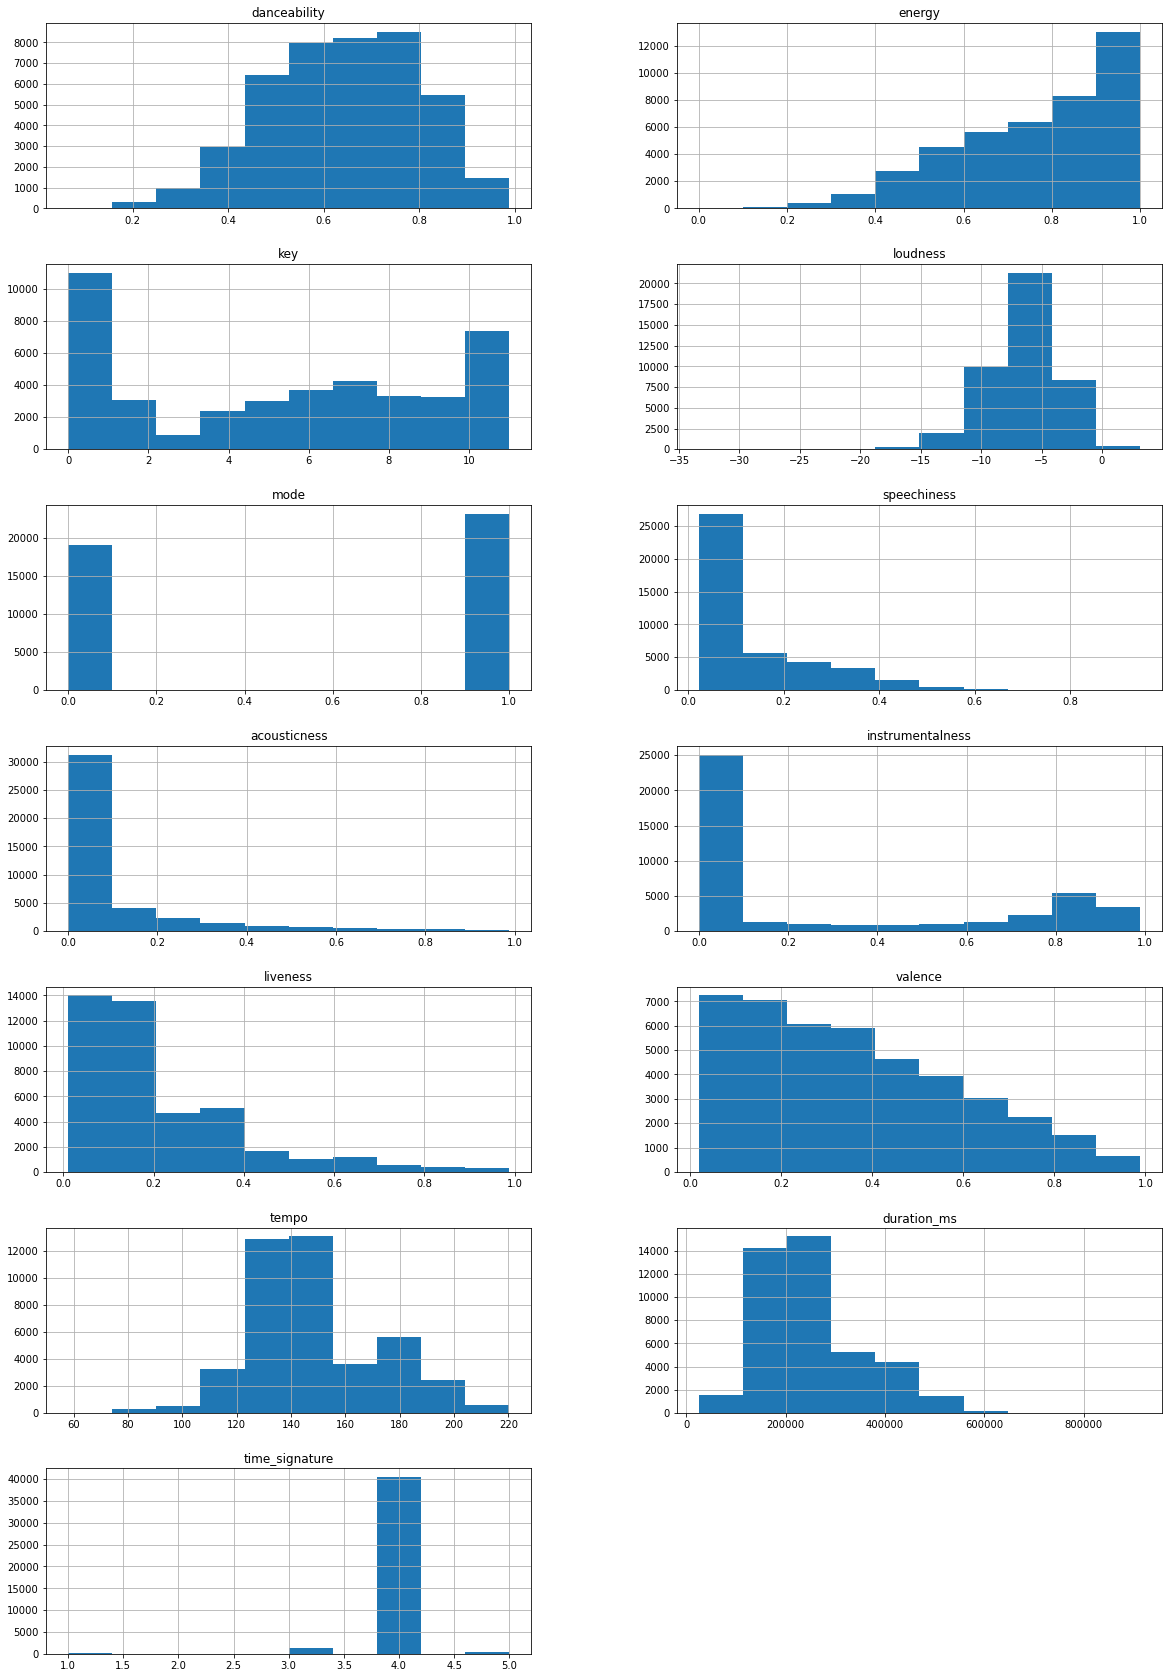

In [12]:
num_data.hist(layout=(7,2),figsize=(20, 30))

#### Barplot and Pie Chart for Genre Value Counts

<AxesSubplot:title={'center':'Genres'}>

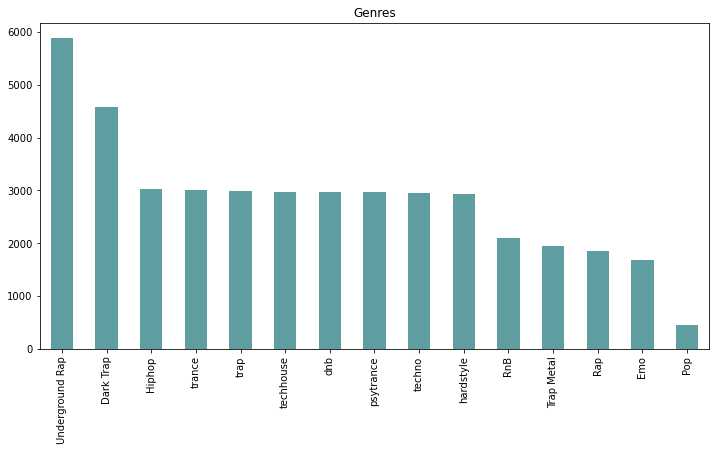

In [13]:
plt.figure(figsize=(12, 6))
spot_df['genre'].value_counts().plot(kind="bar", color="cadetblue", title="Genres")

In [14]:
px.pie(spot_df.genre,
       labels = spot_df.genre.value_counts().index,
       values = spot_df.genre.value_counts().values,
       names = spot_df.genre.value_counts().index,
       title = "Genres on Spotify"
      )

#### Boxplots (Checking Range in Variables Based off Gerne)

In [15]:
px.box(data_frame = spot_df, y = 'duration_ms', color='genre', title='Duration of Songs by Genre')

In [16]:
px.box(data_frame = spot_df, y = 'tempo', color='genre', title='Tempo of Songs by Genre')

In [17]:
px.box(data_frame = spot_df, y = 'energy', color='genre', title='Energy of Songs by Genre')

#### Statistical Breakdown

In [18]:
display(spot_df[['danceability', 'energy', 'key', 'loudness', 'mode','speechiness','acousticness', 
              'instrumentalness', 'liveness','valence','tempo','type','uri','track_href',
              'analysis_url','duration_ms','time_signature','genre']].groupby('genre')
        .agg(['max','mean','min']).style.background_gradient(cmap="flare"))

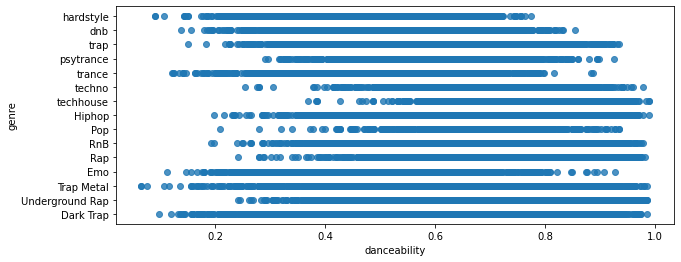

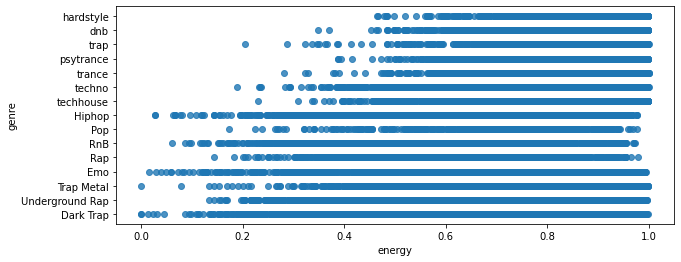

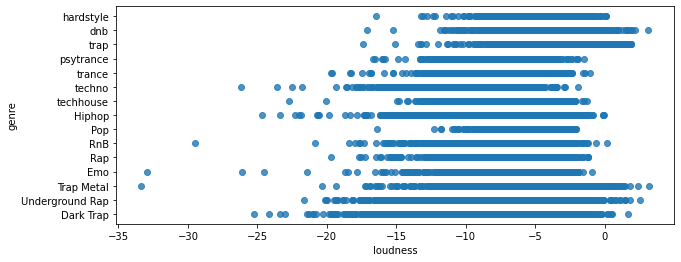

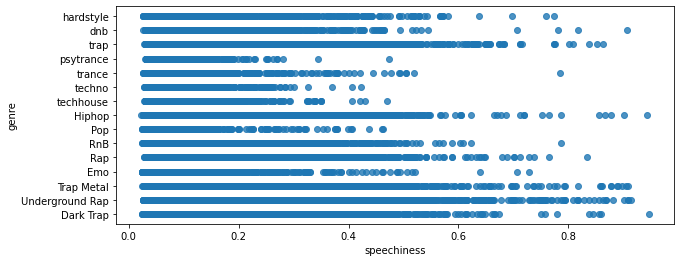

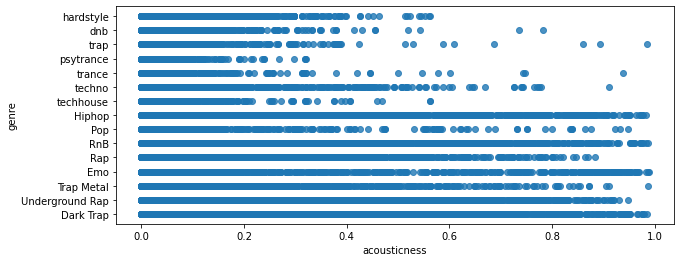

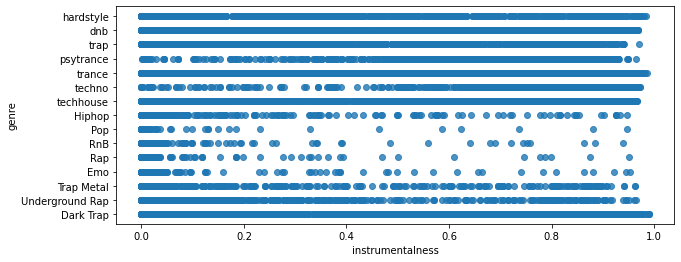

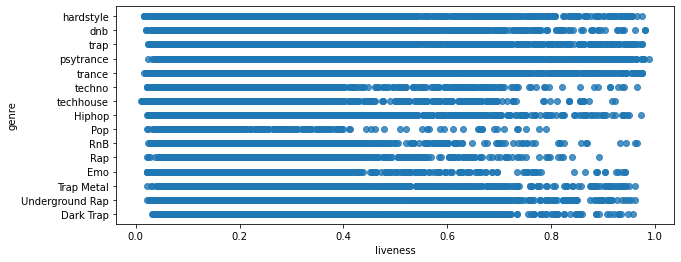

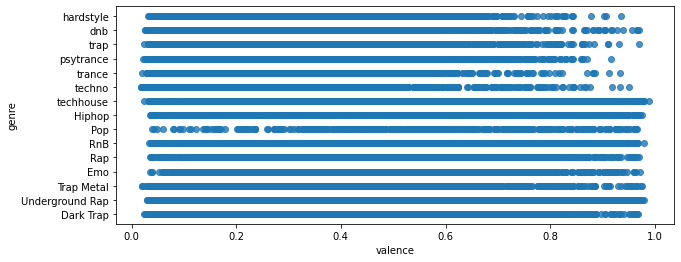

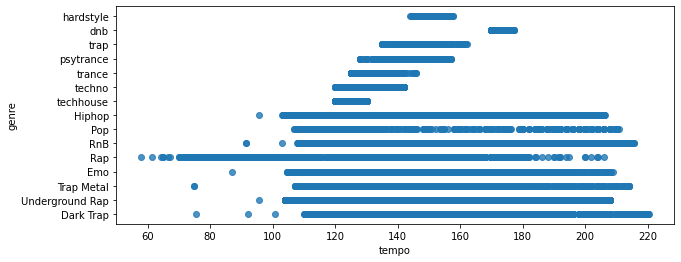

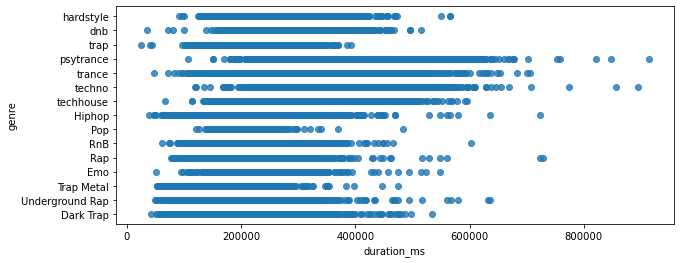

In [19]:
# Create Seaborn Regplots for the Song Makeup Features 
features = ['danceability', 'energy', 'loudness', 'speechiness','acousticness',
            'instrumentalness', 'liveness','valence','tempo','duration_ms']

def plotregs(feature):
    plt.figure(figsize=(10, 4))
    plot = sns.regplot(x=spot_df[feature], y=spot_df['genre'], fit_reg = False)
    plt.show()
    
for x in features:
    plotregs(x)

In [20]:
# Factorize the genre column to assign numbers to each genre for correlation evaluation
spot_df['NUMgenre'] = pd.factorize(spot_df['genre'])[0]
spot_df.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence    tempo            type  \
0          0.013400    0.0556   0.3890  156.985  audio_features   
1          0.000000    0.1180   0.1240  115.080  audio_features   
2          0.000004    0.3720   0.0391  218.050  audio_features   
3          0.000000    0.1140   0.1750  186.948  audio_features   
4          0.000000    0.1660   0.5910  147.988  audio_features   

                                    uri  \
0  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1  spotify:track:7pgJBLVz5VmnL7uGHmRj6p   
2  spotify:track:0vSWgAlfpye0WCGeNmuNhy   
3  spotify:track:0VSXnJqQkwuH2ei1nOQ1nu   
4  spotify:track:4jCeguq9rMTlbMmPHuO7S3   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
1  https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...   
2  https://api.spotify.com/v1/tracks/0vSWgAlfpye0...   
3  https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...   
4  https://api.spotify.com/v1/tracks/4jCeguq9rMTl...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2Vc6...       124539   
1  https://api.spotify.com/v1/audio-analysis/7pgJ...       224427   
2  https://api.spotify.com/v1/audio-analysis/0vSW...        98821   
3  https://api.spotify.com/v1/audio-analysis/0VSX...       123661   
4  https://api.spotify.com/v1/audio-analysis/4jCe...       123298   

   time_signature      genre                                          title  \
0               4  Dark Trap                            Mercury: Retrograde   
1               4  Dark Trap                                      Pathology   
2               4  Dark Trap                                       Symbiote   
3               3  Dark Trap  ProductOfDrugs (Prod. The Virus and Antidote)   
4               4  Dark Trap                                          Venom   

   NUMgenre  
0         0  
1         0  
2         0  
3         0  
4         0

#### Correlation Heatmap

<AxesSubplot:>

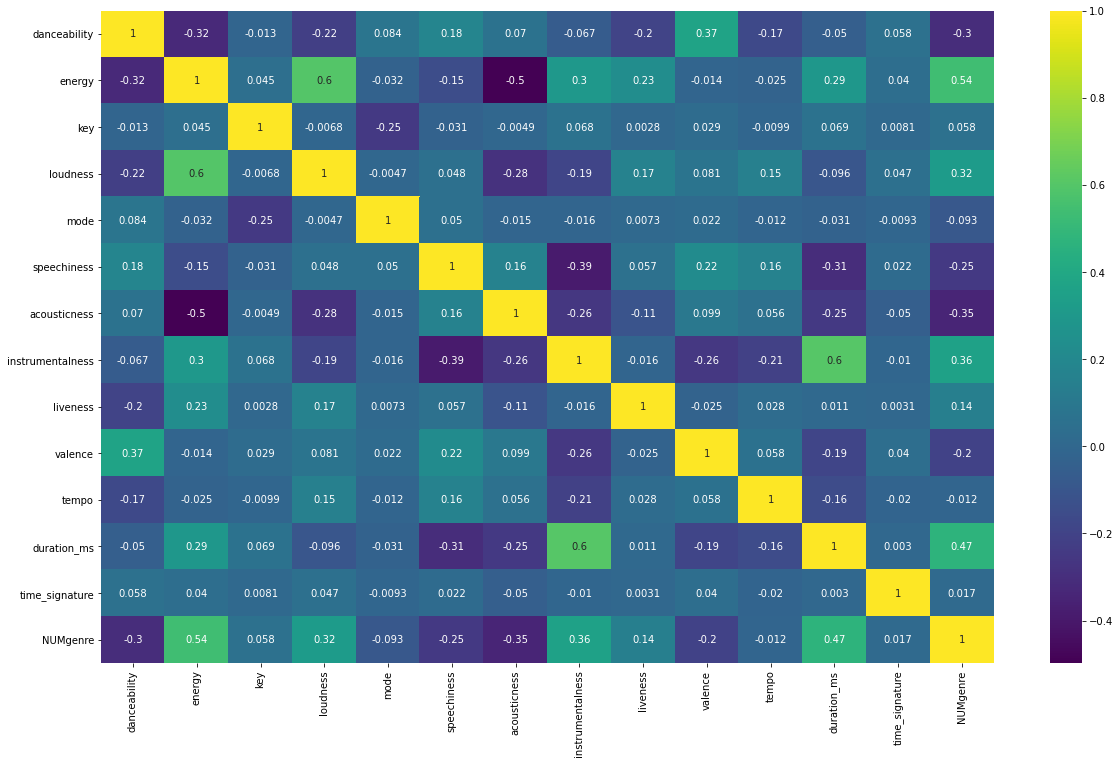

In [21]:
plt.figure(figsize=(20, 12))
sns.heatmap(spot_df.corr(), annot=True, cmap='viridis')

### Modeling

#### Read in Data

In [22]:
# Data for Modeling
liked_df = pd.read_csv("likeddf.csv")
liked_df.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.803  0.6240    7    -6.764     0       0.0477         0.451   
1         0.762  0.7030   10    -7.951     0       0.3060         0.206   
2         0.261  0.0149    1   -27.528     1       0.0419         0.992   
3         0.722  0.7360    3    -6.994     0       0.0585         0.431   
4         0.787  0.5720    1    -7.516     1       0.2220         0.145   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0          0.000734    0.1000   0.6280   95.968       304524               4   
1          0.000000    0.0912   0.5190  151.329       247178               4   
2          0.897000    0.1020   0.0382   75.296       286987               4   
3          0.000001    0.1230   0.5820   89.860       208920               4   
4          0.000000    0.0753   0.6470  155.117       179413               4   

   liked  
0      0  
1      1  
2      0  
3      1  
4      1

In [23]:
liked_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


In [24]:
liked_df.describe()

danceability      energy         key    loudness        mode  \
count    195.000000  195.000000  195.000000  195.000000  195.000000   
mean       0.636656    0.638431    5.497436   -9.481631    0.538462   
std        0.216614    0.260096    3.415209    6.525086    0.499802   
min        0.130000    0.002400    0.000000  -42.261000    0.000000   
25%        0.462500    0.533500    2.000000   -9.962000    0.000000   
50%        0.705000    0.659000    6.000000   -7.766000    1.000000   
75%        0.799000    0.837500    8.000000   -5.829000    1.000000   
max        0.946000    0.996000   11.000000   -2.336000    1.000000   

       speechiness  acousticness  instrumentalness    liveness     valence  \
count   195.000000    195.000000        195.000000  195.000000  195.000000   
mean      0.148957      0.319093          0.192337    0.148455    0.493632   
std       0.120414      0.320782          0.346226    0.105975    0.267695   
min       0.027800      0.000003          0.000000    0.033100    0.035300   
25%       0.056800      0.042200          0.000000    0.084000    0.269000   
50%       0.096200      0.213000          0.000008    0.105000    0.525000   
75%       0.230500      0.504000          0.097500    0.177000    0.717500   
max       0.540000      0.995000          0.969000    0.633000    0.980000   

            tempo    duration_ms  time_signature       liked  
count  195.000000     195.000000      195.000000  195.000000  
mean   121.086174  213408.933333        3.912821    0.512821  
std     28.084829   72152.392864        0.451332    0.501122  
min     60.171000   77203.000000        1.000000    0.000000  
25%    100.242000  178300.500000        4.000000    0.000000  
50%    124.896000  204000.000000        4.000000    1.000000  
75%    142.460500  242373.500000        4.000000    1.000000  
max    180.036000  655213.000000        5.000000    1.000000

#### Check for Missing Values

In [25]:
liked_df.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64

#### Check Correlations

<AxesSubplot:>

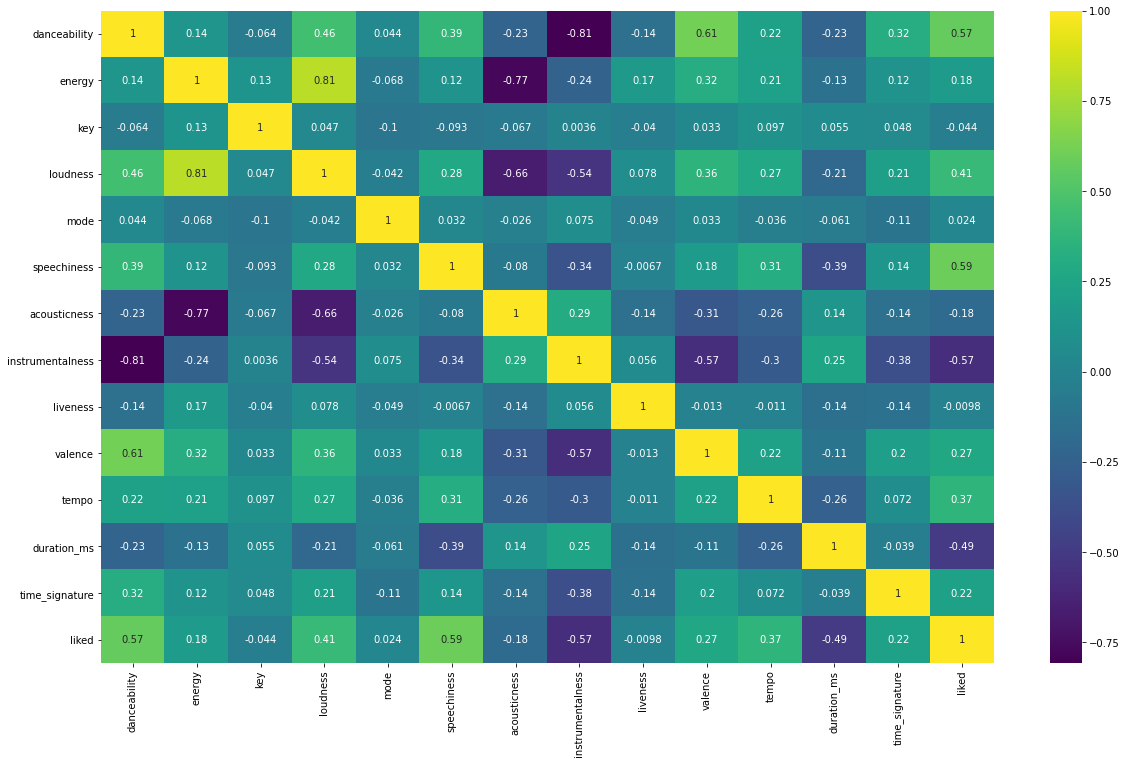

In [26]:
plt.figure(figsize=(20, 12))
sns.heatmap(liked_df.corr(), annot=True, cmap='viridis')

#### Feature Scaling

In [27]:
std = StandardScaler()
scalled = std.fit_transform(liked_df.drop('liked',axis=1))

In [28]:
i = 0 
for column in liked_df.columns[:-1]:
    liked_df[column] = scalled[:,i]
    i += 1

#### Split and Train the Data

In [29]:
x, y = liked_df.drop('liked',axis=1),liked_df['liked']
x.shape, y.shape

((195, 13), (195,))

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((156, 13), (39, 13), (156,), (39,))

In [31]:
y_train.value_counts()

1    79
0    77
Name: liked, dtype: int64

#### Model Building and Predictions

In [32]:
model = keras.Sequential([
    keras.layers.Dense(13, input_shape=(13,), activation='relu'),
    keras.layers.Dense(7, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),

])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
    
)

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 98        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8         
Total params: 288
Trainable params: 288
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(x_train, y_train, epochs=200)

Epoch 1/200
5/5 [==============================] - 1s 4ms/step - loss: 0.7416 - accuracy: 0.4103
Epoch 2/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7202 - accuracy: 0.4231
Epoch 3/200
5/5 [==============================] - 0s 5ms/step - loss: 0.6996 - accuracy: 0.4551
Epoch 4/200
5/5 [==============================] - 0s 5ms/step - loss: 0.6829 - accuracy: 0.5000
Epoch 5/200
5/5 [==============================] - 0s 5ms/step - loss: 0.6671 - accuracy: 0.5449
Epoch 6/200
5/5 [==============================] - 0s 4ms/step - loss: 0.6532 - accuracy: 0.5769
Epoch 7/200
5/5 [==============================] - 0s 4ms/step - loss: 0.6412 - accuracy: 0.6218
Epoch 8/200
5/5 [==============================] - 0s 5ms/step - loss: 0.6297 - accuracy: 0.6474
Epoch 9/200
5/5 [==============================] - 0s 5ms/step - loss: 0.6186 - accuracy: 0.7051
Epoch 10/200
5/5 [==============================] - 0s 5ms/step - loss: 0.6088 - accuracy: 0.7564
Epoch 11/200
5/5 [===========

5/5 [==============================] - 0s 4ms/step - loss: 0.1453 - accuracy: 0.9679
Epoch 85/200
5/5 [==============================] - 0s 4ms/step - loss: 0.1437 - accuracy: 0.9679
Epoch 86/200
5/5 [==============================] - 0s 5ms/step - loss: 0.1420 - accuracy: 0.9679
Epoch 87/200
5/5 [==============================] - 0s 4ms/step - loss: 0.1405 - accuracy: 0.9679
Epoch 88/200
5/5 [==============================] - 0s 5ms/step - loss: 0.1391 - accuracy: 0.9679
Epoch 89/200
5/5 [==============================] - 0s 4ms/step - loss: 0.1374 - accuracy: 0.9679
Epoch 90/200
5/5 [==============================] - 0s 4ms/step - loss: 0.1358 - accuracy: 0.9679
Epoch 91/200
5/5 [==============================] - 0s 4ms/step - loss: 0.1347 - accuracy: 0.9679
Epoch 92/200
5/5 [==============================] - 0s 3ms/step - loss: 0.1330 - accuracy: 0.9679
Epoch 93/200
5/5 [==============================] - 0s 4ms/step - loss: 0.1316 - accuracy: 0.9679
Epoch 94/200
5/5 [===============

5/5 [==============================] - 0s 3ms/step - loss: 0.0673 - accuracy: 0.9744
Epoch 167/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0668 - accuracy: 0.9744
Epoch 168/200
5/5 [==============================] - 0s 5ms/step - loss: 0.0662 - accuracy: 0.9744
Epoch 169/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0656 - accuracy: 0.9808
Epoch 170/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0650 - accuracy: 0.9808
Epoch 171/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0643 - accuracy: 0.9808
Epoch 172/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0638 - accuracy: 0.9808
Epoch 173/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0632 - accuracy: 0.9872
Epoch 174/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0622 - accuracy: 0.9872
Epoch 175/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0612 - accuracy: 0.9872
Epoch 176/200
5/5 [=====

#### Accuracy

In [35]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 1s 11ms/step - loss: 0.0900 - accuracy: 0.9744


[0.08998897671699524, 0.9743589758872986]

In [36]:
def predict(data):
    pred = model.predict(data).flatten()
    pred[pred >= 0.5] = 1
    pred[pred < 0.5] = 0
    return pred

def plot_cm(y_true,y_pred,title=None):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=True, fmt='g',cmap='flare')
    plt.title(title)
    plt.show()

#### Train Data Confusion Matrix and Report

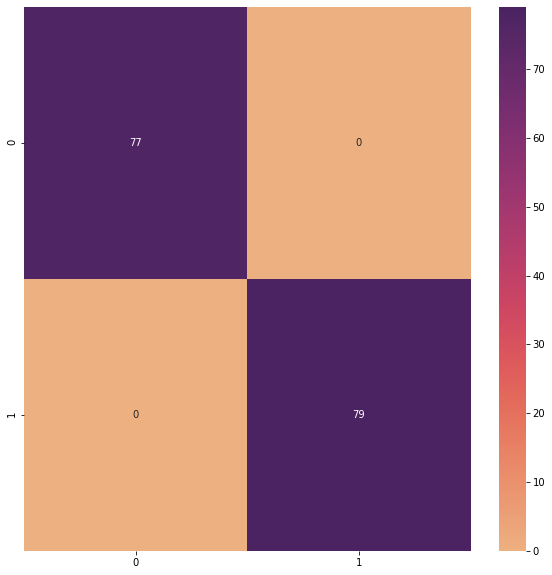

In [37]:
y_pred_train = predict(x_train)
plot_cm(y_train, y_pred_train)

In [38]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        79

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



#### Test Data Confusion Martix and Report

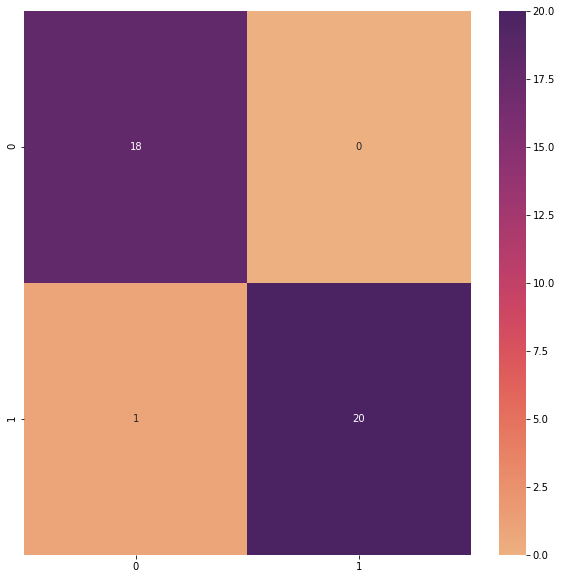

In [39]:
y_pred_test = predict(x_test)
plot_cm(y_test, y_pred_test)

In [40]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.95      0.98        21

    accuracy                           0.97        39
   macro avg       0.97      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39

